# Objective:

To create a model that can identify the emotion (joy, sadness, anger or fear) of a tweet.

# Data:

The dataset is available at Emotion Classification NLP | Kaggle . Acknowledgment: WASSA-2017 Shared Task on Emotion Intensity. Saif M. Mohammad and Felipe Bravo-Marquez. In Proceedings of the EMNLP 2017 Workshop on Computational Approaches to Subjectivity, Sentiment, and Social Media (WASSA), September 2017, Copenhagen, Denmark.

# Problem statement

Identifying the emotion behind human text is an important part of NLP for various applications including customer review analysis and artificial intelligence. The owner of Twitter, Elon Musk has fired everyone who understood emotion classification of tweets because they were not "hard core" enough, and now their existing model is no longer working. As a new employee, your job is to develop a model that can classify the emotional connotation behind tweets. Mr. Musk does not disclose why this is needed but laughs eerily whenever asked about it.

In [149]:
#import statements
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import gdown

In [ ]:
# download data files from google drive
gdown.download(f"https://drive.google.com/uc?id=1QoO08uJw3VQY14xCGZs1Pt4p1BgVIGZv", output='train.csv', quiet=True)
gdown.download(f"https://drive.google.com/uc?id=1YUevp2keDrKeQAoHgb1IH6_jqkX7tylh", output='val.csv', quiet=True)
gdown.download(f"https://drive.google.com/uc?id=1N2xgBYRbpleSKVwcvvY992xNwisFO7YX", output='test.csv', quiet=True)

In [150]:
# load the data into training, testing and validation.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("val.csv")

In [151]:
train_df

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


In [152]:
test_df

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy
...,...,...
3137,Why does Candice constantly pout #GBBO 💄😒,sadness
3138,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness
3139,"@AceOperative789 no pull him afew weeks ago, s...",sadness
3140,I'm buying art supplies and I'm debating how s...,sadness


In [153]:
val_df

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy
...,...,...
342,Common app just randomly logged me out as I wa...,sadness
343,"I'd rather laugh with the rarest genius, in be...",sadness
344,If you #invest in my new #film I will stop ask...,sadness
345,"Just watched Django Unchained, Other people ma...",sadness


In [154]:
# Use pandas.DataFrame.info to check if the entries are the correct datatype for each dataframe.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [155]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3142 non-null   object
 1   label   3142 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB


In [156]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [157]:
# Use pandas.DataFrame.duplicates to check for duplicate entries.

print("Duplicate entries in train_df:", train_df.duplicated().sum())
print("Duplicate entries in test_df:", test_df.duplicated().sum())
print("Duplicate entries in val_df:", val_df.duplicated().sum())

Duplicate entries in train_df: 0
Duplicate entries in test_df: 0
Duplicate entries in val_df: 0


### Use markdown to make observations and explain what you have done.

As we can see above, when we checked for duplicates in the three dataframes we found that there are none. Additionally, having used the .info() we where able to see that all three dataframes share the same data type (object).

In [158]:
from sklearn.preprocessing import LabelEncoder

# Move labels into a separate DataFrame
train_labels = train_df[['label']]
test_labels = test_df[['label']]
val_labels = val_df[['label']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
train_labels_encoded = label_encoder.fit_transform(train_labels['label'])
test_labels_encoded = label_encoder.transform(test_labels['label'])
val_labels_encoded = label_encoder.transform(val_labels['label'])

# Reshape the labels into a 2D array
train_labels_2d = train_labels_encoded.reshape(-1, 1)
test_labels_2d = test_labels_encoded.reshape(-1, 1)
val_labels_2d = val_labels_encoded.reshape(-1, 1)

# Determine which number has been assigned to each label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label Mapping:")
print(label_mapping)  

Label Mapping:
{'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3}


###  Determine which number has been assigned to each label and record this information in markdown.

After moving the labels into a seperate dataframe we then initializing the LabelEncoder. We then fit and transform the labels to turn them into numerical values. After that we reshape them into a 2D arrays with a single column. Finally, we then need to determine which number is attached to which label. We do this by creating a dictionary and using the zip function that pairs each unique label with its corresponding encoded value.

We can see that 'anger' is paired to 0, 'fear' to 1, 'joy' to 2, and 'sadness' to 3.

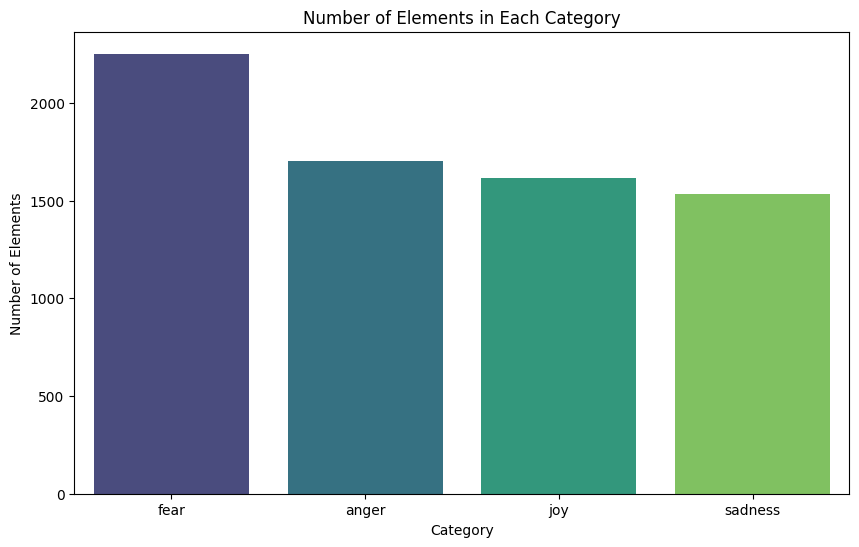

In [159]:
# Create a bar plot using seaborn.barplot of the number of elements in each category

import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate labels from all datasets
all_labels = pd.concat([train_labels, test_labels, val_labels])

# Count the number of elements in each category
label_counts = all_labels['label'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Number of Elements in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Elements')
plt.show()

### Use markdown to comment on how well balanced the dataset is.

Based on the bar plot above, we can see that we don't have a even dataset. We can see that fear leads our dataset with over 2000 classified as fear. We then have anger with around 1600- 1700, joy with around 1600 and, sadness with the lowest count sitting at around 1500.

### Perform the following steps on the tweets in an order of your choosing:
Tokenize each tweet into words.


If you think it is useful, use Speller from the autocorrect library to correct spelling mistakes. 


Create a list of stopwords (using publicly available lists and/or adding your own) and remove these.


Use PorterStemmer or WordNetLemmatizer from nltk.stem on the text.


Use regular expressions (the re library) to do any additional cleanup of the text you wish to do.

In [160]:
import nltk
from nltk import tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
# from autocorrect import Speller
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
# a helper function to get value of column "text"
def get_TXT(df):
  return df["text"].values
# get data in form of ndarray
data_train = get_TXT(train_df)
data_val = get_TXT(val_df)
data_test = get_TXT(test_df)

In [162]:
# prepare stop words set
stop_nltk = stopwords.words("english")
stop_final = stop_nltk + list(punctuation)
# define a function to drop stop words
def drop_stop(input_tokens):
    return [token for token in input_tokens if token not in stop_final]
# create a PorterStemmer
stemmer_p = PorterStemmer()

In [163]:
# a helper function to pre-process data
def prepare_data(data):
  data_tokens = [word_tokenize(comment.lower()) for comment in data]
  data_tokens_no_stop = [drop_stop(sent) for sent in data_tokens]
  data_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in data_tokens_no_stop]
  data_texts = [" ".join(txt) for txt in data_tokens_stem]
  return data_texts

### f. Print out the words in the first five processed tweets along with their 

---

labels. (Viewing this may give you additional ideas for the previous steps.)

In [164]:
# transfer X_train and see the result
TXT_train = prepare_data(data_train)
# a helper function to convert label number to label string
label_content = ['anger', 'fear', 'joy', 'sadness']
get_content = lambda x: label_content[x]
# show first 5 text and labels
for i in range(5):
  print(f'Tokenlized: {TXT_train[i]}')
  print(f"Label: {train_labels_2d[i]} '{get_content(train_labels_2d[i][0])}'")

Tokenlized: got back see garydelaney burslem amaz face still hurt laugh much hilari
Label: [2] 'joy'
Tokenlized: oh dear even absolut hilar n't think laugh much long time 😂
Label: [2] 'joy'
Tokenlized: wait week game ❤️❤️❤️ cheer friday ❤️
Label: [2] 'joy'
Tokenlized: gardiner_lov thank much gloria 're sweet thought made day joy love 😊💕
Label: [2] 'joy'
Tokenlized: feel bless work famili nanni ❤️ noth love amp appreci make smile
Label: [2] 'joy'


In [165]:
# transfer val and test data
TXT_val = prepare_data(data_val)
TXT_test = prepare_data(data_test)

In [166]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [167]:
# initiate a Tokenizer with 10000 vocab size
vocab_size = 10000
tok = Tokenizer(num_words=vocab_size)

In [168]:
# fit the tok
tok.fit_on_texts(TXT_train)

In [169]:
# get train, val and test sequence
train_sequences = tok.texts_to_sequences(TXT_train)
val_sequences = tok.texts_to_sequences(TXT_val)
test_sequences = tok.texts_to_sequences(TXT_test)

In [170]:
# display the sequence value
print(train_sequences[0])

[34, 41, 31, 2250, 2251, 53, 97, 29, 351, 110, 61, 128]


g. Create a histogram showing the lengths of the sequences after preprocessing. Comment on how this helps you to choose the maximum length hyperparameter used when truncating/padding the input sequences.

In [171]:
# get length of each comments in train sequences
seq_lens = [len(seq) for seq in train_sequences]

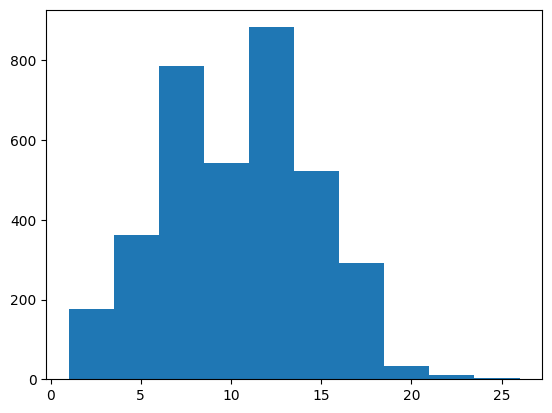

In [172]:
plt.hist(seq_lens)
plt.show()

From the histogram of the length, we can see most sequences are shorter than 25. Therefore, we can set maximum length to 25 for truncating/padding the input sequences.

In [173]:
# set max length of comments to 25
maxlen = 25

### 2. Modeling
a. Create and compile a model using tf.keras.Sequential to predict the emotion label from the text. Start with an embedding layer and build an architecture from dense, LSTM, GRU, bidirectional LSTM or GRU, and dropout layers. Compile the model using a choice of optimizer, sparse_binary_crossentropy for the loss, and the metric set to accuracy.

In [174]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [175]:
# padding the data
X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_val = pad_sequences(val_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)

In [176]:
# display the shape of X_train
X_train.shape

(3613, 25)

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Dropout, GRU, LSTM

In [178]:
#def set_state(seed=88):
#  np.random.seed(seed)
#  tf.random.set_seed(seed)

In [179]:
#set_state
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(4, activation='softmax'))
# compile the model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# display model summarey
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 spatial_dropout1d_9 (Spati  (None, None, 32)          0         
 alDropout1D)                                                    
                                                                 
 lstm_12 (LSTM)              (None, None, 64)          24832     
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                      

b. Train the model on the training data without using a validation split. Calculate and record the training accuracy.

In [180]:
#set_state
# train the model
history_lstm = model_lstm.fit(X_train, train_labels_2d, batch_size=128, epochs = 30, verbose = 2)

Epoch 1/30
29/29 - 4s - loss: 1.3805 - accuracy: 0.3089 - 4s/epoch - 139ms/step
Epoch 2/30
29/29 - 2s - loss: 1.3768 - accuracy: 0.3180 - 2s/epoch - 53ms/step
Epoch 3/30
29/29 - 2s - loss: 1.3771 - accuracy: 0.3180 - 2s/epoch - 60ms/step
Epoch 4/30
29/29 - 2s - loss: 1.3755 - accuracy: 0.3180 - 2s/epoch - 61ms/step
Epoch 5/30
29/29 - 2s - loss: 1.3683 - accuracy: 0.3202 - 2s/epoch - 62ms/step
Epoch 6/30
29/29 - 2s - loss: 1.3322 - accuracy: 0.3712 - 2s/epoch - 65ms/step
Epoch 7/30
29/29 - 2s - loss: 1.2018 - accuracy: 0.4589 - 2s/epoch - 60ms/step
Epoch 8/30
29/29 - 2s - loss: 1.0643 - accuracy: 0.5068 - 2s/epoch - 61ms/step
Epoch 9/30
29/29 - 2s - loss: 0.9614 - accuracy: 0.5414 - 2s/epoch - 61ms/step
Epoch 10/30
29/29 - 2s - loss: 0.8763 - accuracy: 0.5851 - 2s/epoch - 57ms/step
Epoch 11/30
29/29 - 2s - loss: 0.7884 - accuracy: 0.6427 - 2s/epoch - 57ms/step
Epoch 12/30
29/29 - 2s - loss: 0.7427 - accuracy: 0.6609 - 2s/epoch - 56ms/step
Epoch 13/30
29/29 - 2s - loss: 0.6758 - accuracy

In [181]:
# get the training accuarcy
training_accuracy = history_lstm.history['accuracy']
# display traning accuacy for last 10 epochs
print("Training Accuracy(last 10 epochs):\n")
training_accuracy[-10:]

Training Accuracy(last 10 epochs):



[0.9396623373031616,
 0.9429836869239807,
 0.9468585848808289,
 0.9529476761817932,
 0.950179934501648,
 0.9579296708106995,
 0.9606974720954895,
 0.9618045687675476,
 0.9673401713371277,
 0.9651259183883667]

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [183]:
# get prediction
val_pred = model_lstm.predict(X_val)
val_pred = np.argmax(val_pred, axis=1)
# get accuarcy
accuracy = accuracy_score(val_labels_2d, val_pred)
print(f'Prediction on validation data is {accuracy*100:.1f}%')

11/11 [==============================] - 1s 9ms/step
Prediction on validation data is 72.6%


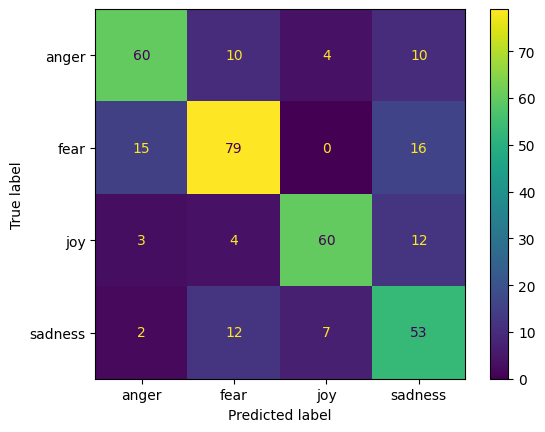

In [184]:
# get confusion matrix
conf_mat = confusion_matrix(val_labels_2d, val_pred)
# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=label_content)
disp.plot()
plt.show()

d. Revisit the previous steps to make at least three models in total by changing architecture and hyperparameters.

In [185]:
from tensorflow.keras.layers import Bidirectional

# Definining our Bidiresctional model
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(vocab_size, output_dim=32, input_length=maxlen))
model_bidirectional_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bidirectional_lstm.add(SpatialDropout1D(0.4))
model_bidirectional_lstm.add(Bidirectional(LSTM(64, return_sequences=False)))
model_bidirectional_lstm.add(Dropout(0.4))
model_bidirectional_lstm.add(Dense(32, activation='relu'))
model_bidirectional_lstm.add(Dropout(0.4))
model_bidirectional_lstm.add(Dense(32, activation='relu'))
model_bidirectional_lstm.add(Dropout(0.4))
model_bidirectional_lstm.add(Dense(4, activation='softmax'))

# Compiling our model
model_bidirectional_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display our bidirectional model summary
model_bidirectional_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 25, 32)            320000    
                                                                 
 bidirectional_6 (Bidirecti  (None, 25, 128)           49664     
 onal)                                                           
                                                                 
 spatial_dropout1d_10 (Spat  (None, 25, 128)           0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                     

In [186]:
# Train the bidirectional model
history_bidirectional_lstm = model_bidirectional_lstm.fit(X_train, train_labels_2d, batch_size=128, epochs = 30, verbose = 2)

Epoch 1/30
29/29 - 8s - loss: 1.3813 - accuracy: 0.2892 - 8s/epoch - 268ms/step
Epoch 2/30
29/29 - 4s - loss: 1.3789 - accuracy: 0.3164 - 4s/epoch - 150ms/step
Epoch 3/30
29/29 - 4s - loss: 1.3734 - accuracy: 0.3169 - 4s/epoch - 145ms/step
Epoch 4/30
29/29 - 4s - loss: 1.1399 - accuracy: 0.4370 - 4s/epoch - 153ms/step
Epoch 5/30
29/29 - 4s - loss: 0.9501 - accuracy: 0.5234 - 4s/epoch - 147ms/step
Epoch 6/30


In [ ]:
# get the training accuarcy for our bidirectional model
training_accuracy_bi = history_bidirectional_lstm.history['accuracy']
# displaying the traning accuacy for last 10 epochs for our bidirectional model
print("Training Accuracy(last 10 epochs):\n")
training_accuracy_bi[-10:]

Training Accuracy(last 10 epochs):



[0.9781345129013062,
 0.9795184135437012,
 0.9731525182723999,
 0.9767506122589111,
 0.9773041605949402,
 0.9809023141860962,
 0.9781345129013062,
 0.9809023141860962,
 0.9795184135437012,
 0.9803487658500671]

In [ ]:
# get prediction for our bidirectional model
val_pred_bi = model_bidirectional_lstm.predict(X_val)
val_pred_bi = np.argmax(val_pred_bi, axis=1)
# get accuarcy for our bidirectional model
accuracy_bi = accuracy_score(val_labels_2d, val_pred_bi)
print(f'Prediction on validation data is {accuracy_bi*100:.1f}%')

11/11 [==============================] - 1s 14ms/step
Prediction on validation data is 77.2%


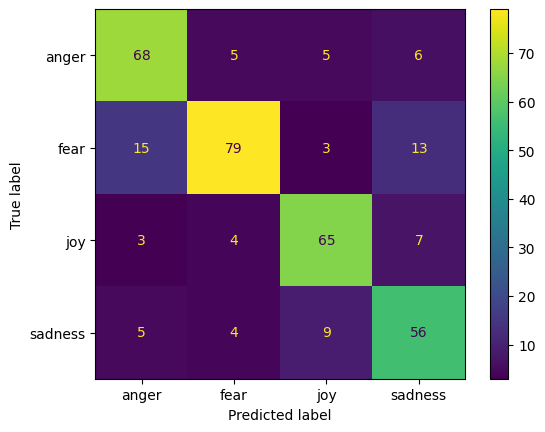

In [ ]:
# get confusion matrix for our bidirectional model
conf_mat_bi = confusion_matrix(val_labels_2d, val_pred_bi)
# display the confusion matrix for our bidirectional model
disp_bi = ConfusionMatrixDisplay(confusion_matrix=conf_mat_bi, display_labels=label_content)
disp_bi.plot()
plt.show()

In [ ]:
from tensorflow.keras.layers import GRU, GlobalMaxPooling1D

# Defining our GRU model
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, output_dim=32, input_length=maxlen))
model_gru.add(SpatialDropout1D(0.4))
model_gru.add(GRU(64, return_sequences=True))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dropout(0.4))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dropout(0.4))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dropout(0.4))
model_gru.add(Dense(4, activation='softmax'))

# Compiling our GRU model
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Displaying our GRU model summary
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 25, 32)            320000    
                                                                 
 spatial_dropout1d_8 (Spati  (None, 25, 32)            0         
 alDropout1D)                                                    
                                                                 
 gru_4 (GRU)                 (None, 25, 64)            18816     
                                                                 
 gru_5 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
# Training our GRU model
history_gru = model_gru.fit(X_train, train_labels_2d, batch_size=128, epochs=30, verbose=2)

Epoch 1/30
29/29 - 3s - loss: 1.3803 - accuracy: 0.3056 - 3s/epoch - 121ms/step
Epoch 2/30
29/29 - 1s - loss: 1.3650 - accuracy: 0.3194 - 1s/epoch - 44ms/step
Epoch 3/30
29/29 - 1s - loss: 1.1828 - accuracy: 0.4409 - 1s/epoch - 48ms/step
Epoch 4/30
29/29 - 1s - loss: 0.9504 - accuracy: 0.5212 - 1s/epoch - 47ms/step
Epoch 5/30
29/29 - 1s - loss: 0.8190 - accuracy: 0.6001 - 1s/epoch - 47ms/step
Epoch 6/30
29/29 - 1s - loss: 0.7147 - accuracy: 0.6488 - 1s/epoch - 47ms/step
Epoch 7/30
29/29 - 1s - loss: 0.5883 - accuracy: 0.7396 - 1s/epoch - 45ms/step
Epoch 8/30
29/29 - 1s - loss: 0.4885 - accuracy: 0.8220 - 1s/epoch - 44ms/step
Epoch 9/30
29/29 - 1s - loss: 0.3541 - accuracy: 0.8918 - 1s/epoch - 43ms/step
Epoch 10/30
29/29 - 1s - loss: 0.3104 - accuracy: 0.9128 - 1s/epoch - 44ms/step
Epoch 11/30
29/29 - 1s - loss: 0.2453 - accuracy: 0.9355 - 1s/epoch - 45ms/step
Epoch 12/30
29/29 - 1s - loss: 0.1924 - accuracy: 0.9488 - 1s/epoch - 44ms/step
Epoch 13/30
29/29 - 1s - loss: 0.1739 - accuracy

In [ ]:
# get the training accuarcy of our GRU model
training_accuracy_gru = history_gru.history['accuracy']
# display traning accuacy for last 10 epochs of our GRU model
print("Training Accuracy(last 10 epochs):\n")
training_accuracy_gru[-10:]

Training Accuracy(last 10 epochs):



[0.9725989699363708,
 0.9745364189147949,
 0.9767506122589111,
 0.973706066608429,
 0.9775809645652771,
 0.977027416229248,
 0.9748131632804871,
 0.9786880612373352,
 0.975643515586853,
 0.9795184135437012]

In [ ]:
# get prediction for our GRU model
val_pred_gru = model_gru.predict(X_val)
val_pred_gru = np.argmax(val_pred_gru, axis=1)
# get accuarcy for our GRU model
accuracy_gru = accuracy_score(val_labels_2d, val_pred_gru)
print(f'Prediction on validation data is {accuracy_gru*100:.1f}%')

11/11 [==============================] - 0s 6ms/step
Prediction on validation data is 77.2%


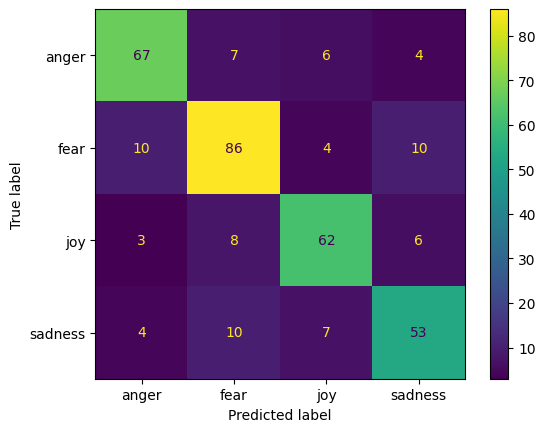

In [ ]:
# get confusion matrix for our GRU model
conf_mat_gru = confusion_matrix(val_labels_2d, val_pred_gru)
# display the confusion matrix for our GRU model
disp_gru = ConfusionMatrixDisplay(confusion_matrix=conf_mat_gru, display_labels=label_content)
disp_gru.plot()
plt.show()

# 3


## Comment on the relative merits of each model. Select the best model based on quantitative metrics and plots. Use markdown to explain why you feel this is the best model.

### LSTM Model:

The LSTM model demonstrates a respectable performance with a training accuracy of 96.5%. However, its predictive power on the validation data drops to 72.6%. Delving into the confusion matrix analysis, we observe the following:

- **Anger:** Although the model correctly predicts 60 instances, there are 24 failed predictions.
- **Fear:**  Although the model correctly predicts 79 instances, there are 31 failed predictions.
- **Joy:**   Although the model correctly predicts 60 instances, there are 19 failed predictions.
- **Sadness:** Although the model correctly predicts 53 instances, there are 21 failed predictions.

### Bidirectional LSTM Model:

The Bidirectional LSTM model outperforms the basic LSTM, boasting a training accuracy of 98.0% and achieving a prediction accuracy of 77.2% on the validation set. A closer look at the confusion matrix yields the following insights:

- **Anger:** Although the model correctly predicts 68 instances, there are 16 failed predictions.
- **Fear:**  Although the model correctly predicts 79 instances, there are 31 failed predictions.
- **Joy:**   Although the model correctly predicts 65 instances, there are 14 failed predictions.
- **Sadness:** Although the model correctly predicts 56 instances, there are 18 failed predictions.

### GRU Model:

The GRU model stands out as the most successful among the three, with an impressive training accuracy of 98.0% and a prediction accuracy of 77.2% on the validation data. Examining the confusion matrix provides the following analysis:


- **Anger:** Although the model correctly predicts 67 instances, there are 17 failed predictions.
- **Fear:**  Although the model correctly predicts 86 instances, there are 24 failed predictions.
- **Joy:**   Although the model correctly predicts 62 instances, there are 17 failed predictions.
- **Sadness:** Although the model correctly predicts 53 instances, there are 21 failed predictions.

Overall, all three models have overfitting problems. The GRU model and Bidirectional LSTM model have similar and better performance than the LSTM model. There is room for refinement, especially in handling sadness. Since GRU model need less computation and training tiem, we can choose GRU model as the best model in this senario.


## Make predictions on the testing data; calculate the testing accuracy and display the confusion matrix for test data. 

In [ ]:
# get prediction for our GRU model
test_pred_gru = model_gru.predict(X_test)
test_pred_gru = np.argmax(test_pred_gru, axis=1)
# get accuarcy for our GRU model
accuracy_gru = accuracy_score(test_labels_2d, test_pred_gru)
print(f'Prediction on testing data is {accuracy_gru*100:.1f}%')

99/99 [==============================] - 1s 7ms/step
Prediction on testing data is 73.1%


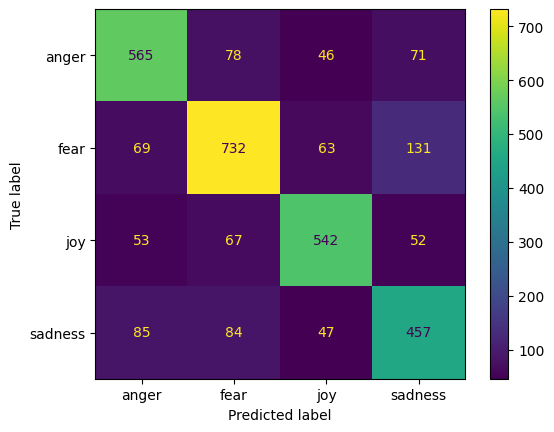

In [ ]:
# get confusion matrix for our GRU model
conf_mat_gru = confusion_matrix(test_labels_2d, test_pred_gru)
# display the confusion matrix for our GRU model
disp_gru = ConfusionMatrixDisplay(confusion_matrix=conf_mat_gru, display_labels=label_content)
disp_gru.plot()
plt.show()

## Use markdown to describe how well you feel your model will work to classify the emotional connotation of a tweet. Provide a quantitative measure of accuracy and describe an shortcomings of the model.

### Model Evaluation:

Our emotional connotation classification model demonstrates a reasonable performance across various datasets. The prediction accuracy metrics are as follows:

- Prediction on Testing Data: 73.1%
- Prediction on Validation Data: 77.2%
- Prediction on Training Data: 98.0%

### Confusion Matrix Analysis:

Taking a closer look at the confusion matrix, we observe the following:

- **Anger:** Out of 760 instances, the model correctly predicts 565, resulting in an recall rate of approximately 74%.
- **Fear:** The model correctly predicts 732 instances out of 995, yielding an recall rate of around 74%.
- **Joy:** With 542 correct predictions out of 714 instances, the recall rate is approximately 76%.
- **Sadness:** The model accurately predicts 457 instances out of 673, resulting in an recall rate of about 68%.

### Model Shortcomings:

While the model performs reasonably well overall, there are noteworthy shortcomings:

- **Sadness Prediction:** The model shows relatively lower accuracy in predicting sadness, achieving only around 68%. This suggests an area for improvement, and further tuning may be needed to enhance the model's recall rate to sadness.

In summary, the model exhibits satisfactory performance, especially in predicting joy, but addressing the identified shortcomings, particularly in predicting sadness, would contribute to overall improvement.